In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def showimg(img,cmap="gray"):
	plt.imshow(img, cmap), plt.xticks([]), plt.yticks([])
	plt.show()

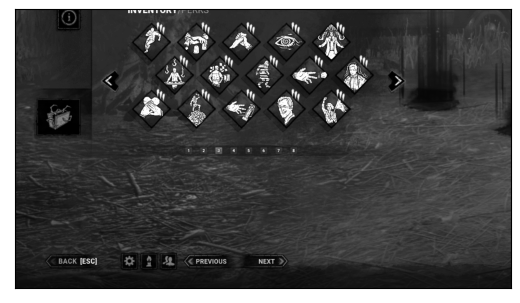

In [4]:
screen = cv2.cvtColor(cv2.imread("screen1.png"), cv2.COLOR_BGR2GRAY)
h,w = screen.shape
screen = screen[h//2:,:w//2]
showimg(screen)

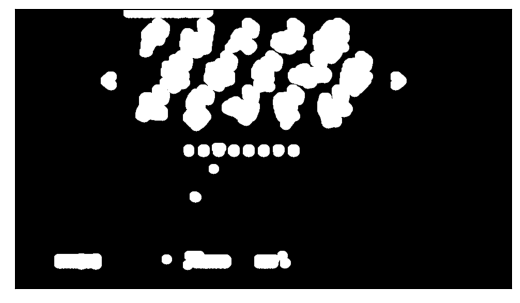

In [11]:
_,pages = cv2.threshold(screen, 130, 255, cv2.THRESH_BINARY)
pages = cv2.morphologyEx(pages, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20)))
showimg(pages)

In [6]:
_,_,stats,_ = cv2.connectedComponentsWithStats(pages, connectivity=8, ltype=cv2.CV_16U)

In [7]:
median_top = np.median([comp[cv2.CC_STAT_TOP] for comp in stats if 350 < comp[cv2.CC_STAT_AREA] < 750])
buttons = [comp for comp in stats if abs(comp[cv2.CC_STAT_TOP] - median_top) < 20]

(395, 273)
(336, 274)
(365, 274)
(423, 274)
(452, 274)
(481, 274)
(510, 274)
(539, 274)


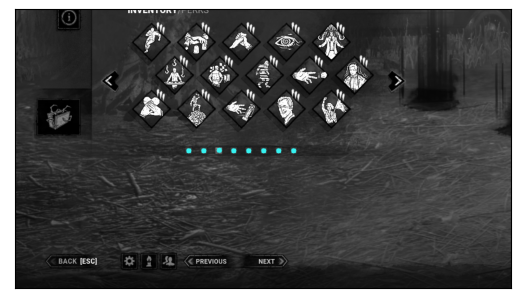

In [8]:
screen2 = cv2.cvtColor(screen, cv2.COLOR_GRAY2BGR)
for button in buttons:
    x = button[cv2.CC_STAT_LEFT] + button[cv2.CC_STAT_WIDTH] // 2
    y = button[cv2.CC_STAT_TOP] + button[cv2.CC_STAT_HEIGHT] // 2
    cv2.circle(screen2, (x,y), 5, (54,243,241), thickness=cv2.FILLED)
    print((x,y))
showimg(screen2, cmap=None)